## Superdense Coding
Credit to IBM Quantum Computing course.
\
\
Superdense coding is a protocol that, in some sense, achieves a complementary aim to teleportation. Rather than allowing for the transmission of one qubit using two classical bits of communication (at the cost of one e-bit of entanglement), it allows for the transmission of two classical bits using one qubit of quantum communication (again, at the cost of one e-bit of entanglement).

In greater detail, we have a sender (Alice) and a receiver (Bob) that share one e-bit of entanglement. According to the conventions in place for the lesson, this means that Alice holds a qubit
A
,
A, Bob holds a qubit
B
,
B, and together the pair
(
A
,
B
)
(A,B) is in the state
∣
ϕ
+
⟩
.
∣ϕ
+
 ⟩. Alice wishes to transmit two classical bits to Bob, which we'll denoted by
c and
,
d, and she will accomplish this by sending him one qubit.

Protocol

The following quantum circuit diagram describes the superdense coding protocol:
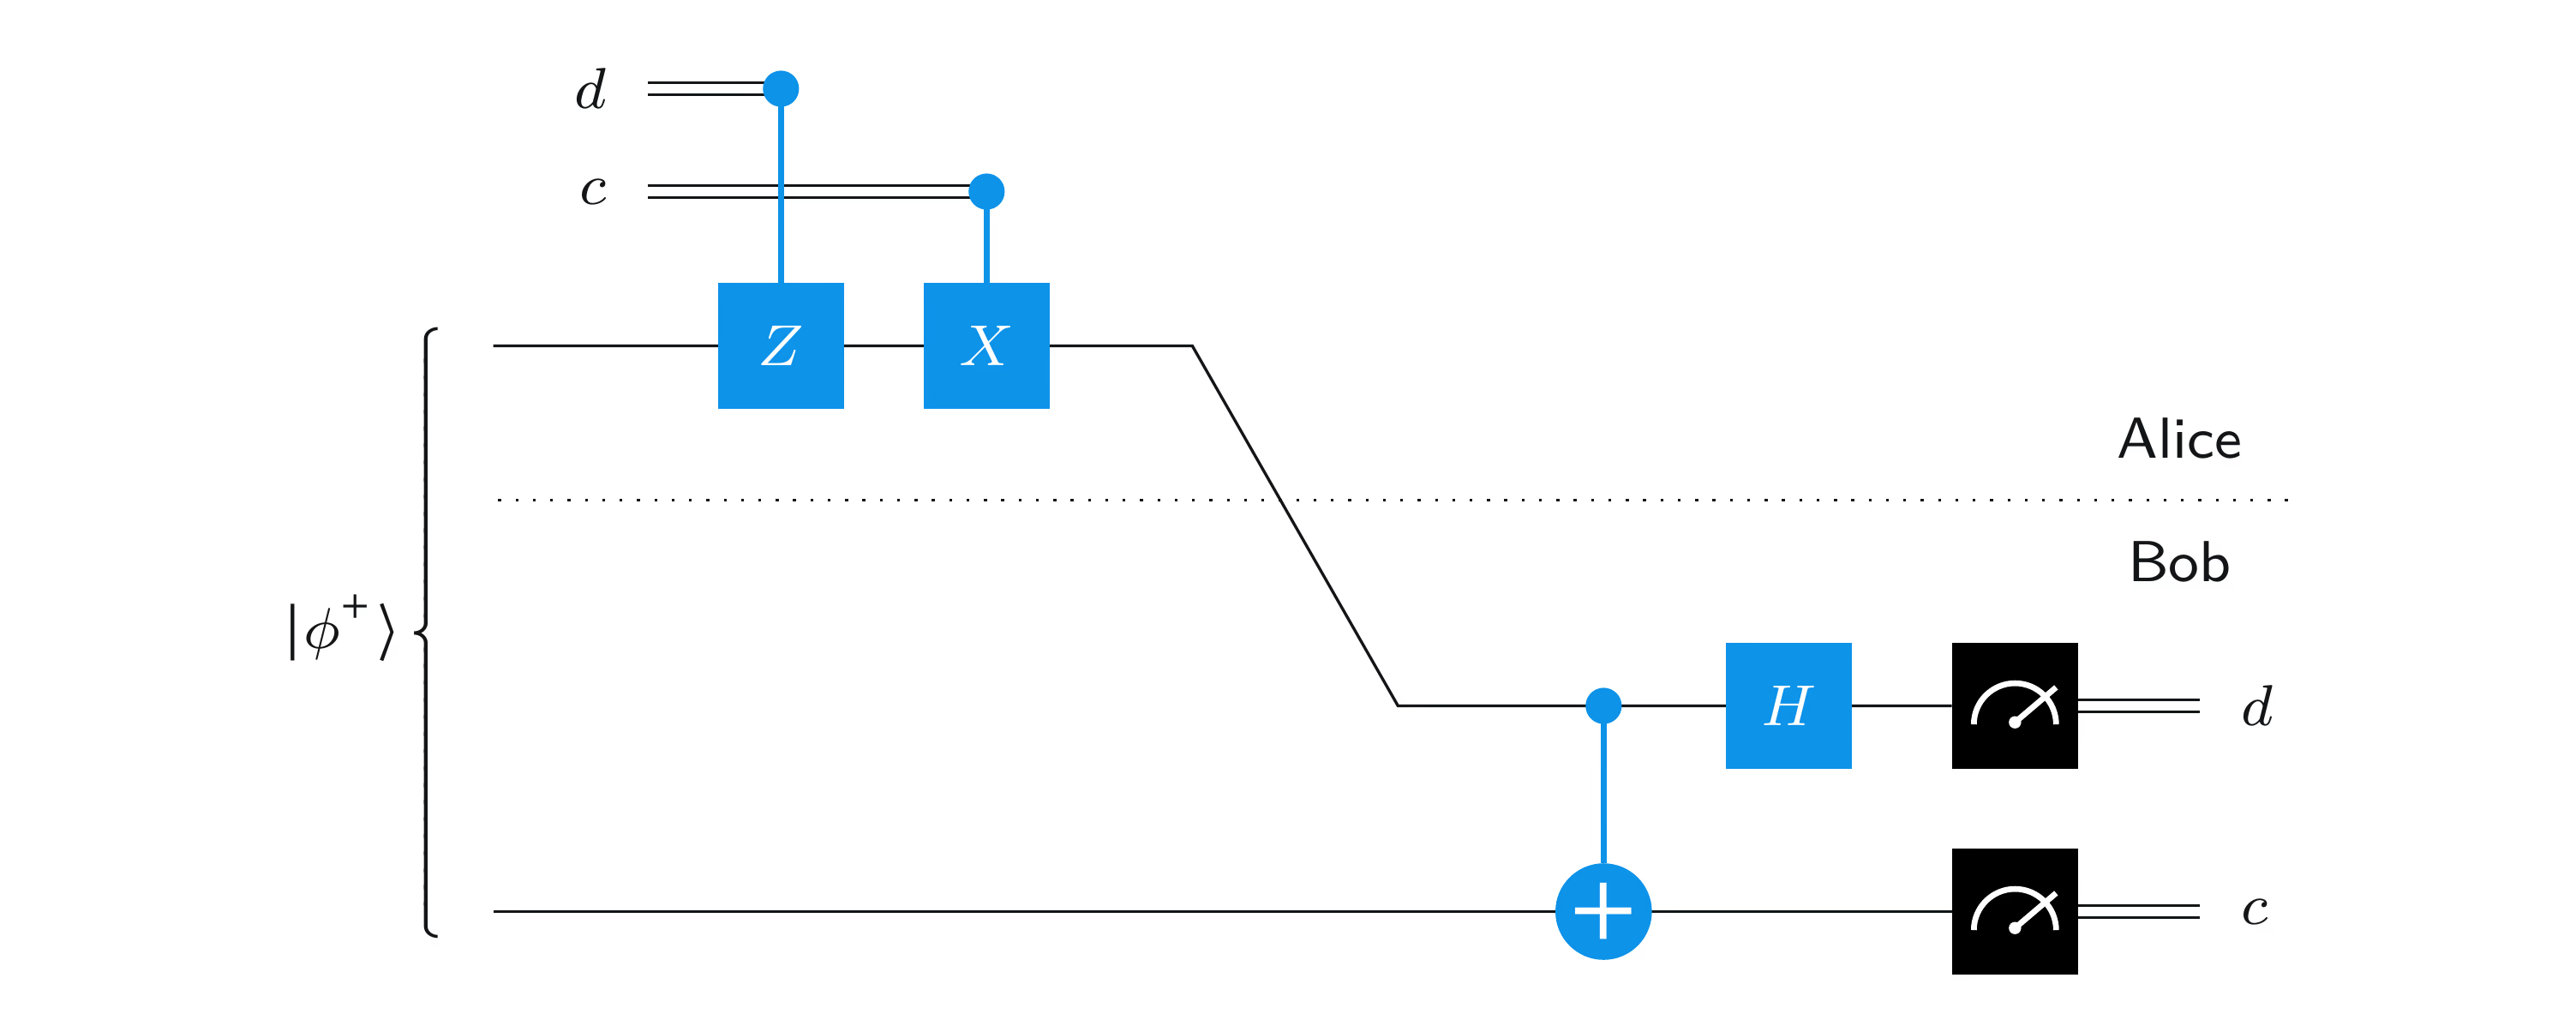

In words, here is what Alice does:

If
d=1, Alice performs a
Z gate on her qubit
A (and if
d=0 she does not).

If
c=1, Alice performs an
X gate on her qubit
A (and if
c
=
0
c=0 she does not).

Alice then sends her qubit
A to Bob.

What Bob does when he receives the qubit
A is to first perform a controlled-NOT gate, with
A being the control and
B being the target, and then he applies a Hadamard gate to
A
.
A. He then measures
B to obtain
c and
A to obtain
,
d, with standard basis measurements in both cases.

First you need to install Qiskit using the following command.

Import the following libraries

In [1]:
# Required imports

from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit_aer.primitives import Sampler
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram, plot_bloch_multivector

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning, message="Sampler has been deprecated")


Here is a simple implementation of superdense coding where we specify the circuit itself depending on the bits to be transmitted. First let's specify the bits to be transmitted.


In [2]:
def Superdense_Coding(c, d):
    entangledbit0 = QuantumRegister(1, "A")
    entangledbit1 = QuantumRegister(1, "B")
    qc = QuantumCircuit(entangledbit0, entangledbit1)

    # TODO: Initialize the entangled qubits
    qc.h(entangledbit0)
    qc.cx(entangledbit0, entangledbit1)


    qc.barrier()

    # TODO: Alice's operations
    # If d=1, Alice performs a Z gate on her qubit A (and if d=0 she does not).
    if d == 1:
        qc.z(entangledbit0)
    # If c=1, Alice performs an X gate on her qubit A (and if c=0 she does not).
    if c == 1:
        qc.x(entangledbit0)


    qc.barrier()

    # TODO: Bob's actions
    # Perform a controlled-NOT gate, with A being the control and B being the target
    qc.cx(entangledbit0, entangledbit1)
    # Apply a Hadamard gate to A
    qc.h(entangledbit0)


    Bob_c = ClassicalRegister(1, "Bob c")
    Bob_d = ClassicalRegister(1, "Bob d")
    qc.add_register(Bob_d)
    qc.add_register(Bob_c)

    # TODO:
    # Use measure function to measure the qubits and put them into c, d appropriately
    qc.measure([entangledbit0[0], entangledbit1[0]], [Bob_d[0], Bob_c[0]])
    display(qc.draw())
    return qc

In [3]:
def RUN(c, d):
    protocol = Superdense_Coding(c, d)
    result = Sampler().run(protocol).result()
    statistics = result.quasi_dists[0].binary_probabilities()

    for outcome, frequency in statistics.items():
        print(f"Measured {outcome} with frequency {frequency}")
    display(plot_histogram(statistics))

## 1. Case c = 0, d = 0

┌───┐      ░  ░      ┌───┐┌─┐
      A: ┤ H ├──■───░──░───■──┤ H ├┤M├
         └───┘┌─┴─┐ ░  ░ ┌─┴─┐└┬─┬┘└╥┘
      B: ─────┤ X ├─░──░─┤ X ├─┤M├──╫─
              └───┘ ░  ░ └───┘ └╥┘  ║ 
Bob d: 1/═══════════════════════╬═══╩═
                                ║   0 
Bob c: 1/═══════════════════════╩═════
                                0

Measured 00 with frequency 1.0


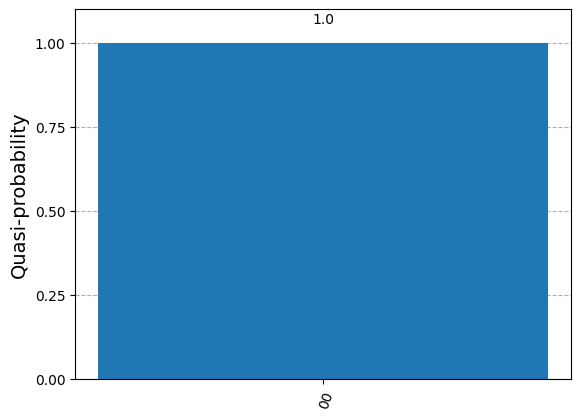

In [4]:
RUN(c = 0, d = 0)

## 2. Case c = 0, d = 1

┌───┐      ░ ┌───┐ ░      ┌───┐┌─┐
      A: ┤ H ├──■───░─┤ Z ├─░───■──┤ H ├┤M├
         └───┘┌─┴─┐ ░ └───┘ ░ ┌─┴─┐└┬─┬┘└╥┘
      B: ─────┤ X ├─░───────░─┤ X ├─┤M├──╫─
              └───┘ ░       ░ └───┘ └╥┘  ║ 
Bob d: 1/════════════════════════════╬═══╩═
                                     ║   0 
Bob c: 1/════════════════════════════╩═════
                                     0

Measured 01 with frequency 1.0


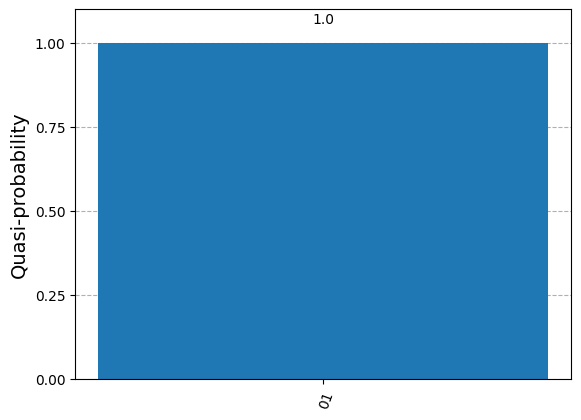

In [5]:
RUN(c = 0, d = 1)

## 3. Case c = 1, d = 0

┌───┐      ░ ┌───┐ ░      ┌───┐┌─┐
      A: ┤ H ├──■───░─┤ X ├─░───■──┤ H ├┤M├
         └───┘┌─┴─┐ ░ └───┘ ░ ┌─┴─┐└┬─┬┘└╥┘
      B: ─────┤ X ├─░───────░─┤ X ├─┤M├──╫─
              └───┘ ░       ░ └───┘ └╥┘  ║ 
Bob d: 1/════════════════════════════╬═══╩═
                                     ║   0 
Bob c: 1/════════════════════════════╩═════
                                     0

Measured 10 with frequency 1.0


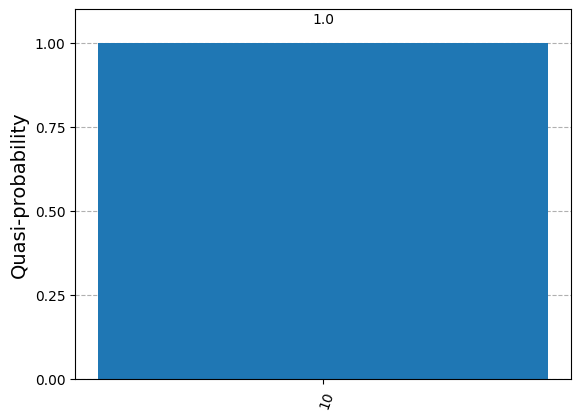

In [6]:
RUN(c = 1, d = 0)

## 4. Case c = 1, d = 1

┌───┐      ░ ┌───┐┌───┐ ░      ┌───┐┌─┐
      A: ┤ H ├──■───░─┤ Z ├┤ X ├─░───■──┤ H ├┤M├
         └───┘┌─┴─┐ ░ └───┘└───┘ ░ ┌─┴─┐└┬─┬┘└╥┘
      B: ─────┤ X ├─░────────────░─┤ X ├─┤M├──╫─
              └───┘ ░            ░ └───┘ └╥┘  ║ 
Bob d: 1/═════════════════════════════════╬═══╩═
                                          ║   0 
Bob c: 1/═════════════════════════════════╩═════
                                          0

Measured 11 with frequency 1.0


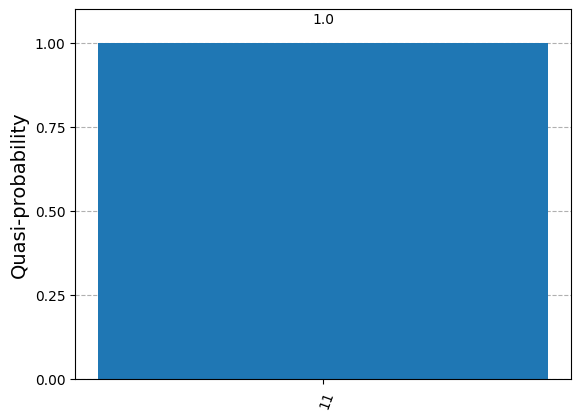

In [7]:
RUN(c = 1, d = 1)

In [8]:
##########

## This is a code in case using Alice c and Alice d classical registers is a must, but since classical registers cannot be initialized by choice like in quantum registers, I use a quantum bit to initialize them

In [9]:
def Superdense_Coding_2(c, d):
    entangledbit0 = QuantumRegister(1, "A")
    entangledbit1 = QuantumRegister(1, "B")

    Alice_c = ClassicalRegister(1, "Alice c")
    Alice_d = ClassicalRegister(1, "Alice d")

    qc = QuantumCircuit(entangledbit0, entangledbit1, Alice_d, Alice_c)
    ##
    if c == 0:
        qc.measure(entangledbit0[0], Alice_c[0])
    if d == 0:
        qc.measure(entangledbit0[0], Alice_d[0])
    qc.x(entangledbit0)
    if c == 1:
        qc.measure(entangledbit0[0], Alice_c[0])
    if d == 1:
        qc.measure(entangledbit0[0], Alice_d[0])
    qc.x(entangledbit0)
    ##
    qc.barrier()
    

    # TODO: Initialize the entangled qubits
    qc.h(entangledbit0)
    qc.cx(entangledbit0, entangledbit1)


    qc.barrier()

    # TODO: Alice's operations
    # If d=1, Alice performs a Z gate on her qubit A (and if d=0 she does not).
    qc.z(entangledbit0).c_if(Alice_d, 1)
    # if d == 1:
    #     qc.z(entangledbit0)
    # If c=1, Alice performs an X gate on her qubit A (and if c=0 she does not).
    qc.x(entangledbit0).c_if(Alice_c, 1)
    # if c == 1:
    #     qc.x(entangledbit0)


    qc.barrier()

    # TODO: Bob's actions
    # Perform a controlled-NOT gate, with A being the control and B being the target
    qc.cx(entangledbit0, entangledbit1)
    # Apply a Hadamard gate to A
    qc.h(entangledbit0)


    Bob_c = ClassicalRegister(1, "Bob c")
    Bob_d = ClassicalRegister(1, "Bob d")
    qc.add_register(Bob_d)
    qc.add_register(Bob_c)

    # TODO:
    # Use measure function to measure the qubits and put them into c, d appropriately
    qc.measure([entangledbit0[0], entangledbit1[0]], [Bob_d[0], Bob_c[0]])
    display(qc.draw())
    return qc

In [10]:
def RUN_2(c, d):
    protocol = Superdense_Coding_2(c, d)
    result = Sampler().run(protocol).result()
    statistics = result.quasi_dists[0].binary_probabilities()

    for outcome, frequency in statistics.items():
        print(f"Measured {outcome} with frequency {frequency}")
    display(plot_histogram(statistics))

---------> Case c = 0, d = 0


┌─┐┌─┐┌───┐┌───┐ ░ ┌───┐      ░  ┌───┐  ┌───┐  ░      ┌───┐┌─┐
        A: ┤M├┤M├┤ X ├┤ X ├─░─┤ H ├──■───░──┤ Z ├──┤ X ├──░───■──┤ H ├┤M├
           └╥┘└╥┘└───┘└───┘ ░ └───┘┌─┴─┐ ░  └─╥─┘  └─╥─┘  ░ ┌─┴─┐└┬─┬┘└╥┘
        B: ─╫──╫────────────░──────┤ X ├─░────╫──────╫────░─┤ X ├─┤M├──╫─
            ║  ║            ░      └───┘ ░ ┌──╨──┐   ║    ░ └───┘ └╥┘  ║ 
Alice d: 1/═╬══╩═══════════════════════════╡ 0x1 ╞═══╬═════════════╬═══╬═
            ║  0                           └─────┘┌──╨──┐          ║   ║ 
Alice c: 1/═╩═════════════════════════════════════╡ 0x1 ╞══════════╬═══╬═
            0                                     └─────┘          ║   ║ 
  Bob d: 1/════════════════════════════════════════════════════════╬═══╩═
                                                                   ║   0 
  Bob c: 1/════════════════════════════════════════════════════════╩═════
                                                                   0

Measured 0000 with frequency 1.0


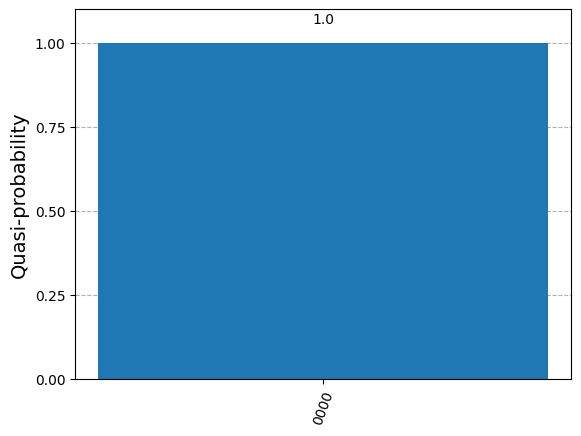

---------> Case c = 0, d = 1


┌─┐┌───┐┌─┐┌───┐ ░ ┌───┐      ░  ┌───┐  ┌───┐  ░      ┌───┐┌─┐
        A: ┤M├┤ X ├┤M├┤ X ├─░─┤ H ├──■───░──┤ Z ├──┤ X ├──░───■──┤ H ├┤M├
           └╥┘└───┘└╥┘└───┘ ░ └───┘┌─┴─┐ ░  └─╥─┘  └─╥─┘  ░ ┌─┴─┐└┬─┬┘└╥┘
        B: ─╫───────╫───────░──────┤ X ├─░────╫──────╫────░─┤ X ├─┤M├──╫─
            ║       ║       ░      └───┘ ░ ┌──╨──┐   ║    ░ └───┘ └╥┘  ║ 
Alice d: 1/═╬═══════╩══════════════════════╡ 0x1 ╞═══╬═════════════╬═══╬═
            ║       0                      └─────┘┌──╨──┐          ║   ║ 
Alice c: 1/═╩═════════════════════════════════════╡ 0x1 ╞══════════╬═══╬═
            0                                     └─────┘          ║   ║ 
  Bob d: 1/════════════════════════════════════════════════════════╬═══╩═
                                                                   ║   0 
  Bob c: 1/════════════════════════════════════════════════════════╩═════
                                                                   0

Measured 0101 with frequency 1.0


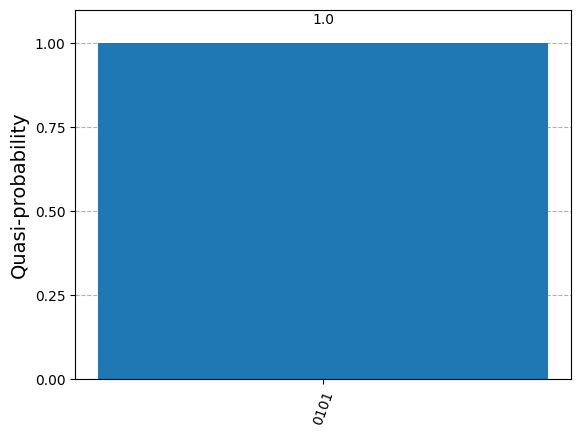

---------> Case c = 1, d = 0


┌─┐┌───┐┌─┐┌───┐ ░ ┌───┐      ░  ┌───┐  ┌───┐  ░      ┌───┐┌─┐
        A: ┤M├┤ X ├┤M├┤ X ├─░─┤ H ├──■───░──┤ Z ├──┤ X ├──░───■──┤ H ├┤M├
           └╥┘└───┘└╥┘└───┘ ░ └───┘┌─┴─┐ ░  └─╥─┘  └─╥─┘  ░ ┌─┴─┐└┬─┬┘└╥┘
        B: ─╫───────╫───────░──────┤ X ├─░────╫──────╫────░─┤ X ├─┤M├──╫─
            ║       ║       ░      └───┘ ░ ┌──╨──┐   ║    ░ └───┘ └╥┘  ║ 
Alice d: 1/═╩═══════╬══════════════════════╡ 0x1 ╞═══╬═════════════╬═══╬═
            0       ║                      └─────┘┌──╨──┐          ║   ║ 
Alice c: 1/═════════╩═════════════════════════════╡ 0x1 ╞══════════╬═══╬═
                    0                             └─────┘          ║   ║ 
  Bob d: 1/════════════════════════════════════════════════════════╬═══╩═
                                                                   ║   0 
  Bob c: 1/════════════════════════════════════════════════════════╩═════
                                                                   0

Measured 1010 with frequency 1.0


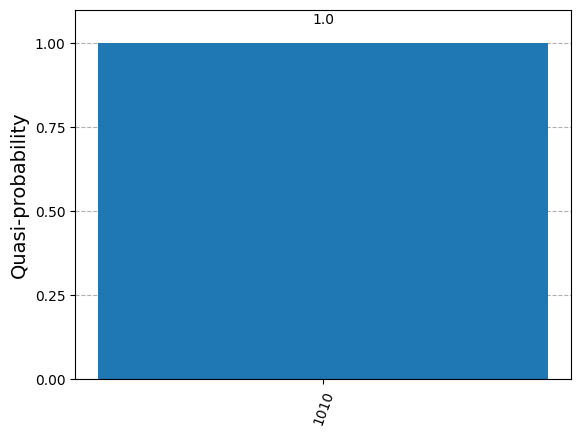

---------> Case c = 1, d = 1


┌───┐┌─┐┌─┐┌───┐ ░ ┌───┐      ░  ┌───┐  ┌───┐  ░      ┌───┐┌─┐
        A: ┤ X ├┤M├┤M├┤ X ├─░─┤ H ├──■───░──┤ Z ├──┤ X ├──░───■──┤ H ├┤M├
           └───┘└╥┘└╥┘└───┘ ░ └───┘┌─┴─┐ ░  └─╥─┘  └─╥─┘  ░ ┌─┴─┐└┬─┬┘└╥┘
        B: ──────╫──╫───────░──────┤ X ├─░────╫──────╫────░─┤ X ├─┤M├──╫─
                 ║  ║       ░      └───┘ ░ ┌──╨──┐   ║    ░ └───┘ └╥┘  ║ 
Alice d: 1/══════╬══╩══════════════════════╡ 0x1 ╞═══╬═════════════╬═══╬═
                 ║  0                      └─────┘┌──╨──┐          ║   ║ 
Alice c: 1/══════╩════════════════════════════════╡ 0x1 ╞══════════╬═══╬═
                 0                                └─────┘          ║   ║ 
  Bob d: 1/════════════════════════════════════════════════════════╬═══╩═
                                                                   ║   0 
  Bob c: 1/════════════════════════════════════════════════════════╩═════
                                                                   0

Measured 1111 with frequency 1.0


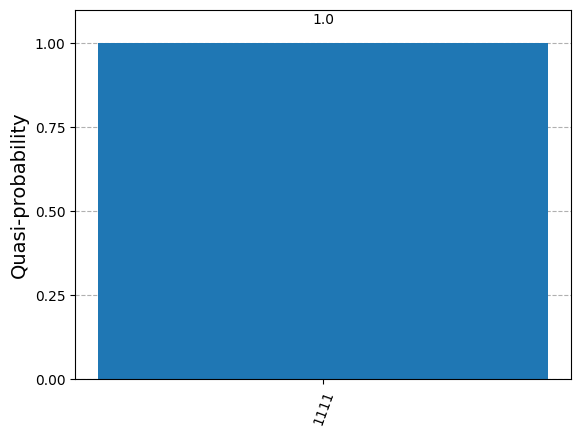

In [11]:
print("---------> Case c = 0, d = 0")
RUN_2(c = 0, d = 0)
print("---------> Case c = 0, d = 1")
RUN_2(c = 0, d = 1)
print("---------> Case c = 1, d = 0")
RUN_2(c = 1, d = 0)
print("---------> Case c = 1, d = 1")
RUN_2(c = 1, d = 1)